In [1]:
import pandas as pd

In [2]:
df_b=pd.read_csv("d:/csv-ml/boston_dataset.csv")

In [3]:
df_b.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df_b.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
type(df_b)

pandas.core.frame.DataFrame

In [18]:
df_b.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [4]:
df_b=df_b.drop("Unnamed: 0",axis=1)

In [5]:
x=df_b.iloc[:,0:13]

In [6]:
y=df_b.iloc[:,13]

In [8]:
from sklearn.model_selection import train_test_split

In [20]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [21]:
from mlxtend.evaluate import bias_variance_decomp

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model_full=LinearRegression()

In [24]:
mse,bias,variance=bias_variance_decomp(model_full,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [25]:
print("mse:=",mse)
print("bias:=",bias)
print("variance:=",variance)

mse:= 24.992873247421052
bias:= 23.720867460410265
variance:= 1.2720057870107775


In [26]:
model_full_1=model_full.fit(x_tr,y_tr)

In [27]:
p_full=model_full_1.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,p_full)

0.7555033086871304

In [44]:
model_full.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

In [45]:
x_tr.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [46]:
lm_coef=pd.DataFrame({"column":x_tr.columns,"coef":model_full.coef_})

In [47]:
lm_coef

,column,coef
0,crim,-0.081490
1,zn,0.048041
2,indus,-0.005472
3,chas,3.062606
4,nox,-16.136881
5,rm,3.672451
6,age,-0.008515
7,dis,-1.517409
8,rad,0.287271
9,tax,-0.012121


<AxesSubplot:xlabel='column', ylabel='coef'>

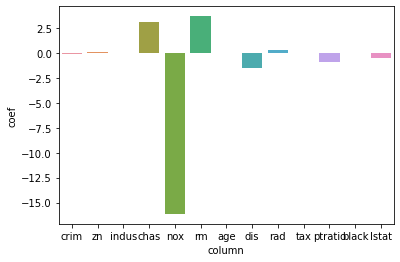

In [48]:
import seaborn as sns
sns.barplot(x="column",y="coef",data=lm_coef)

# ridge regression

In [30]:
from sklearn.linear_model import Ridge

In [53]:
model_ridge=Ridge(alpha=1.0)

In [54]:
mse,bias,var=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [55]:
print("mse:=",mse)
print("bias:=",bias)
print("variance:=",variance)

mse:= 25.51199572114511
bias:= 24.258097493088872
variance:= 1.2720057870107775


In [56]:
model_ridge_1=model_ridge.fit(x_tr,y_tr)

In [57]:
p_ridge=model_ridge_1.predict(x_test)

In [58]:
r2_score(y_test,p_ridge)

0.7500978146031212

In [59]:
ridge_coef=pd.DataFrame({"features":x_tr.columns,"coef":model_ridge.coef_})

In [60]:
ridge_coef

,features,coef
0,crim,-0.077191
1,zn,0.049234
2,indus,-0.033538
3,chas,2.897073
4,nox,-8.907673
5,rm,3.708437
6,age,-0.014932
7,dis,-1.410302
8,rad,0.270201
9,tax,-0.012861


<AxesSubplot:xlabel='features', ylabel='coef'>

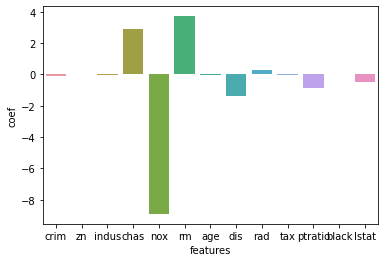

In [61]:
sns.barplot(x="features",y="coef",data=ridge_coef)

# lasso regression

In [62]:
from sklearn.linear_model import Lasso

In [81]:
lasso_model=Lasso(1.0)

In [84]:
lasso_model_1=lasso_model.fit(x_tr,y_tr)

In [85]:
mse,bias,var=bias_variance_decomp(lasso_model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [86]:
print("mse:=",mse)
print("bias:=",bias)
print("variance:=",variance)

mse:= 32.04212910815324
bias:= 30.99725972097484
variance:= 1.2720057870107775


In [88]:
lasso_coef=pd.DataFrame({"features":x_tr.columns,"coef":lasso_model_1.coef_})

In [89]:
lasso_coef

,features,coef
0,crim,-0.041403
1,zn,0.020804
2,indus,-0.111259
3,chas,0.000000
4,nox,-0.000000
5,rm,0.204214
6,age,0.011592
7,dis,-0.555794
8,rad,0.210029
9,tax,-0.006293


<AxesSubplot:xlabel='features', ylabel='coef'>

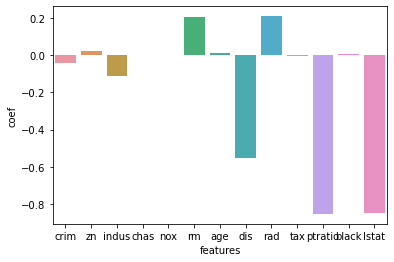

In [93]:
sns.barplot(x="features",y="coef",data=lasso_coef)

In [90]:
p_lasso=lasso_model_1.predict(x_test)

In [92]:
r2_score(y_test,p_lasso)

0.6719069117608121